# 1.3 Feature Engineering
Normalização e padronização de dados

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [235]:
df = pd.read_csv('../dados/00.fase 2/data.csv')
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [236]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [237]:
corr_matrix = df.corr(numeric_only=True).round(2)

<Axes: >

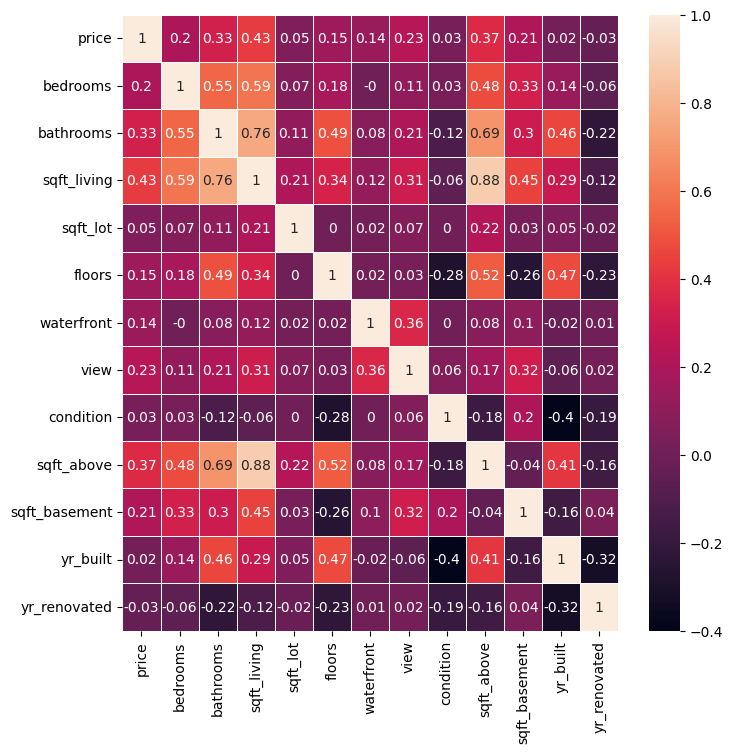

In [238]:
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=corr_matrix, annot=True, linewidths=-0.5, ax=ax)

In [239]:
# Variáveis que vamos comparar:
x = df[['sqft_living', 'bathrooms']].values
y = df['price'].values

<Axes: xlabel='sqft_living', ylabel='price'>

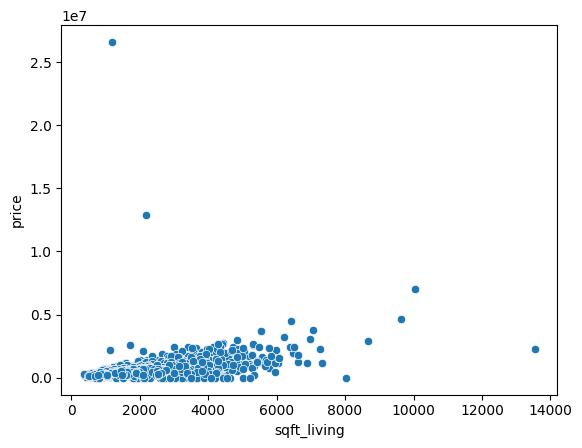

In [240]:
sns.scatterplot(data=df, x='sqft_living', y='price')

<Axes: xlabel='bathrooms', ylabel='price'>

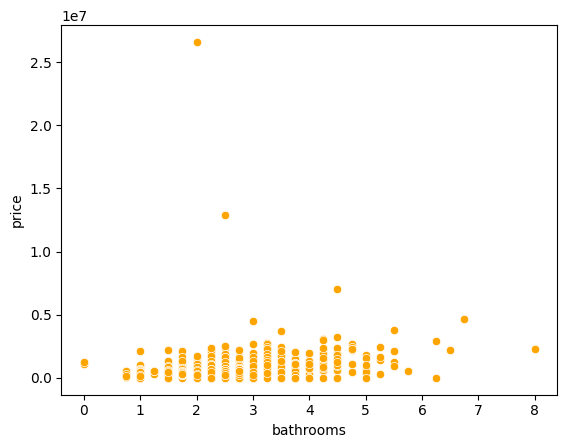

In [241]:
sns.scatterplot(data=df, x='bathrooms', y='price', color='orange')

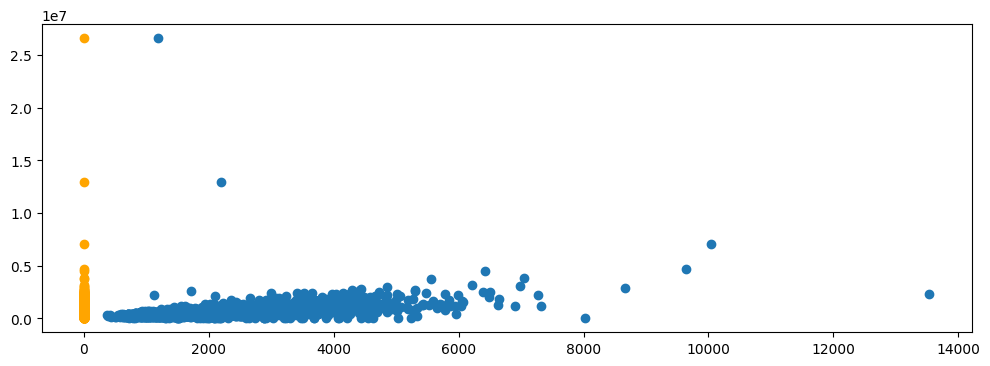

In [242]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(data=df, x='sqft_living', y='price')
ax.scatter(data=df, x='bathrooms', y='price', color='orange')

Não são a mesma escala, mesma **unidade de medida**.

Queremos colocá-los **na mesma escala** para melhor compará-los!

Analisando a distribuição dos dados com histograma:

<Axes: xlabel='sqft_living', ylabel='Count'>

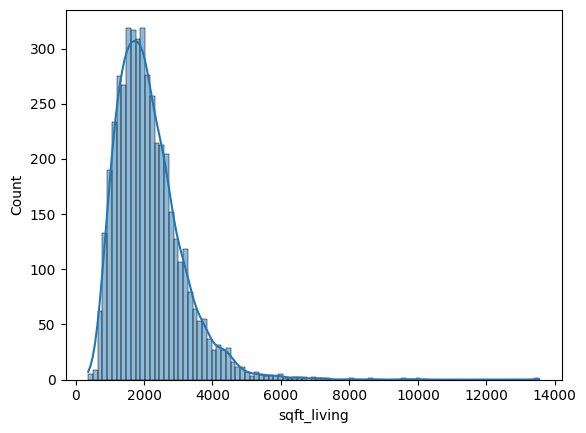

In [243]:
sns.histplot(data=df, x="sqft_living", kde=True)

<Axes: xlabel='bathrooms', ylabel='Count'>

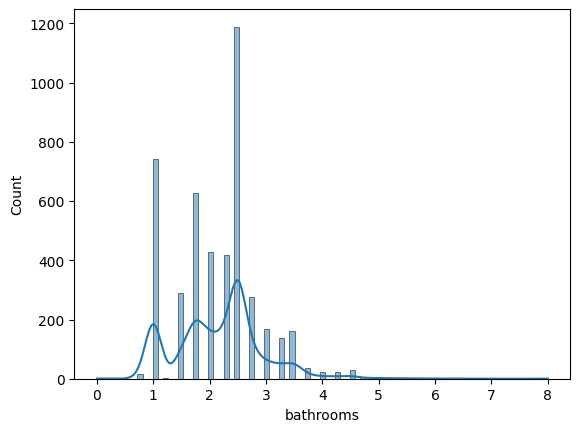

In [244]:
sns.histplot(data=df, x="bathrooms", kde=True)

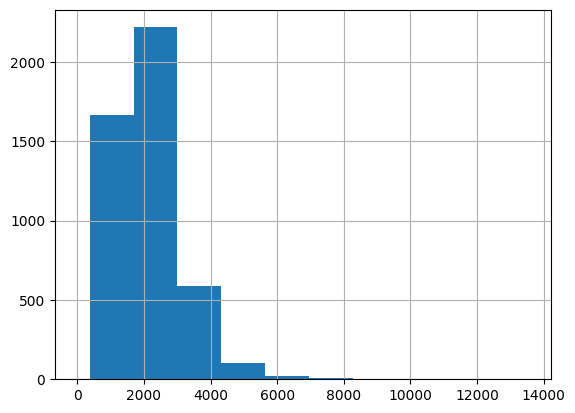

In [245]:
hist_variaveis= pd.DataFrame(df, columns=["sqft_living", "bathrooms"])

hist_variaveis.sqft_living.hist();
hist_variaveis.bathrooms.hist();

# Não dá para comparar!

Trabalhar com variáveis de escalas diferentes pode ser difícil porque pode afetar a comparabilidade dos dados e a precisão das análises estatísticas realizadas. Para lidar com esse problema, é importante padronizar/normalizar as variáveis na mesma escala antes de realizar as análises.

## Padronização dos dados

In [246]:
scaler = StandardScaler()

x_std = scaler.fit_transform(x)
x_std

array([[-0.82997105, -0.84320364],
       [ 1.56852826,  0.43280154],
       [-0.21736733, -0.20520105],
       ...,
       [ 0.90400897,  0.43280154],
       [-0.05123751, -0.20520105],
       [-0.67422434,  0.43280154]], shape=(4600, 2))

<Axes: >

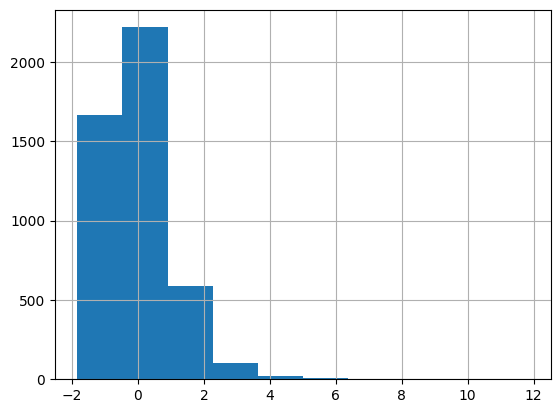

In [247]:
x_std = pd.DataFrame(x_std, columns=['sqft_living', 'bathrooms'])
x_std.sqft_living.hist()


<Axes: >

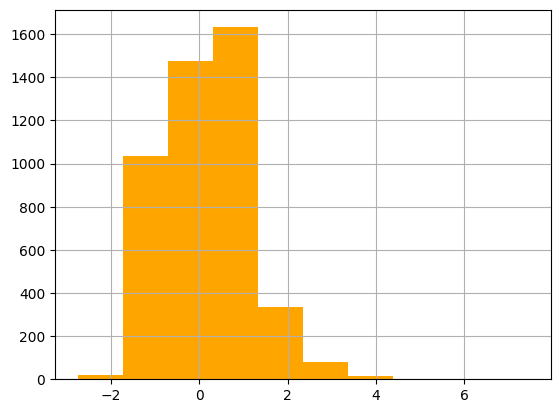

In [248]:
x_std.bathrooms.hist(color='orange')

In [249]:
x_join = x_std
x_join['price'] = df['price']
x_join

,sqft_living,bathrooms,price
0,-0.829971,-0.843204,3.130000e+05
1,1.568528,0.432802,2.384000e+06
2,-0.217367,-0.205201,3.420000e+05
3,-0.144686,0.113800,4.200000e+05
4,-0.206984,0.432802,5.500000e+05
...,...,...,...
4595,-0.653458,-0.524202,3.081667e+05
4596,-0.705374,0.432802,5.343333e+05
4597,0.904009,0.432802,4.169042e+05
4598,-0.051238,-0.205201,2.034000e+05


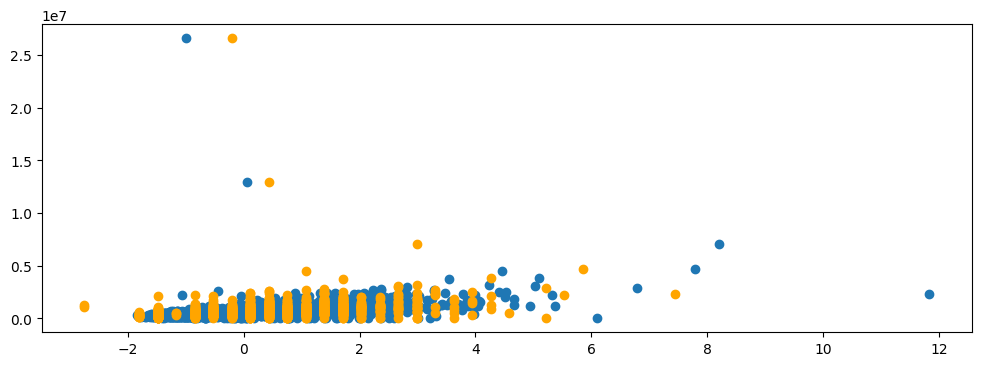

In [250]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(data=x_join, x='sqft_living', y='price')
ax.scatter(data=x_join, x='bathrooms', y='price', color='orange')

## Treinando o modelo
### Target = price

In [251]:
x = df[['sqft_living', 'bathrooms']].values
y = df[['price']].values

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2)

In [253]:
print(len(x_train),len(x_test))

3450 1150


### MinMaxScaler
O MinMaxScaler transforma cada característica em um novo intervalo entre 0 e 1, preservando a relação entre as diferentes características do conjunto de dados. Isso é feito subtraindo o valor mínimo de cada característica e dividindo pela amplitude (diferença entre o valor máximo e mínimo).

In [254]:
#Escalonando os dados
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### LinearRegression

In [255]:
# Treinando o modelo
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [256]:
# Fazendo as previsões
y_pred = model.predict(x_test_scaled)

Quanto R2 mais próximo de 1, melhor.

In [257]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE',MAE)
print('r²',r2)

MAE 207349.7004963648
r² 0.06869032899821292


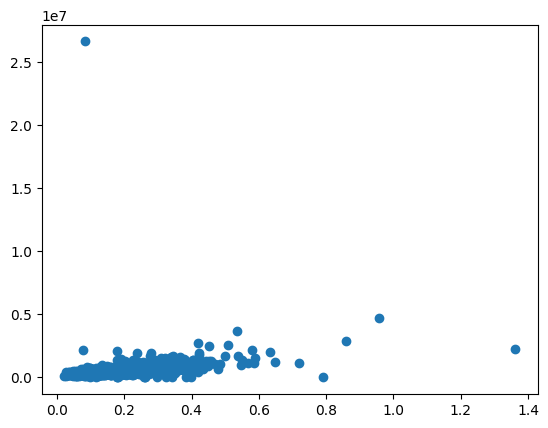

In [258]:
plt.scatter(y=y_test, x=x_test_scaled[:,[0]])

[]

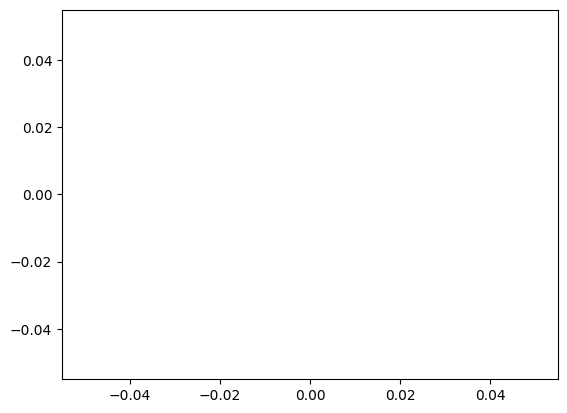

In [259]:
plt.plot(data=y_pred)

## SEM padronizar

In [260]:
# Treinando o modelo
model_normal = LinearRegression()

model_normal.fit(x_train, y_train)

# Fazendo as previsões
y_pred_normal = model_normal.predict(x_test)

# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_normal)
r2 = r2_score(y_test, y_pred_normal)
print('MAE',MAE)
print('r²',r2)

MAE 207349.70049636473
r² 0.06869032899821292


MESMO resultado.

Há modelos que não são tão afetados pelo escalonamento.

# Self-study

In [261]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [262]:
x_data = pd.DataFrame()

In [263]:
x_data['sqft_living'] = df['sqft_living']
x_data['bathrooms'] = df['bathrooms']
x_data

,sqft_living,bathrooms
0,1340,1.50
1,3650,2.50
2,1930,2.00
3,2000,2.25
4,1940,2.50
...,...,...
4595,1510,1.75
4596,1460,2.50
4597,3010,2.50
4598,2090,2.00


In [264]:
#Escalonando os dados
scaler = MinMaxScaler()

scaler.fit(x_data)

x_data_scaled = scaler.transform(x_data)
x_data_scaled

array([[0.07365224, 0.1875    ],
       [0.24905087, 0.3125    ],
       [0.11845103, 0.25      ],
       ...,
       [0.20045558, 0.3125    ],
       [0.13059985, 0.25      ],
       [0.08504176, 0.3125    ]], shape=(4600, 2))

In [265]:
x_data_scaled = pd.DataFrame(x_data_scaled)
x_data_scaled.columns = x_data.columns
x_data_scaled

,sqft_living,bathrooms
0,0.073652,0.18750
1,0.249051,0.31250
2,0.118451,0.25000
3,0.123766,0.28125
4,0.119210,0.31250
...,...,...
4595,0.086560,0.21875
4596,0.082764,0.31250
4597,0.200456,0.31250
4598,0.130600,0.25000


In [266]:
x_data_scaled['price'] = df['price']
x_data_scaled

,sqft_living,bathrooms,price
0,0.073652,0.18750,3.130000e+05
1,0.249051,0.31250,2.384000e+06
2,0.118451,0.25000,3.420000e+05
3,0.123766,0.28125,4.200000e+05
4,0.119210,0.31250,5.500000e+05
...,...,...,...
4595,0.086560,0.21875,3.081667e+05
4596,0.082764,0.31250,5.343333e+05
4597,0.200456,0.31250,4.169042e+05
4598,0.130600,0.25000,2.034000e+05


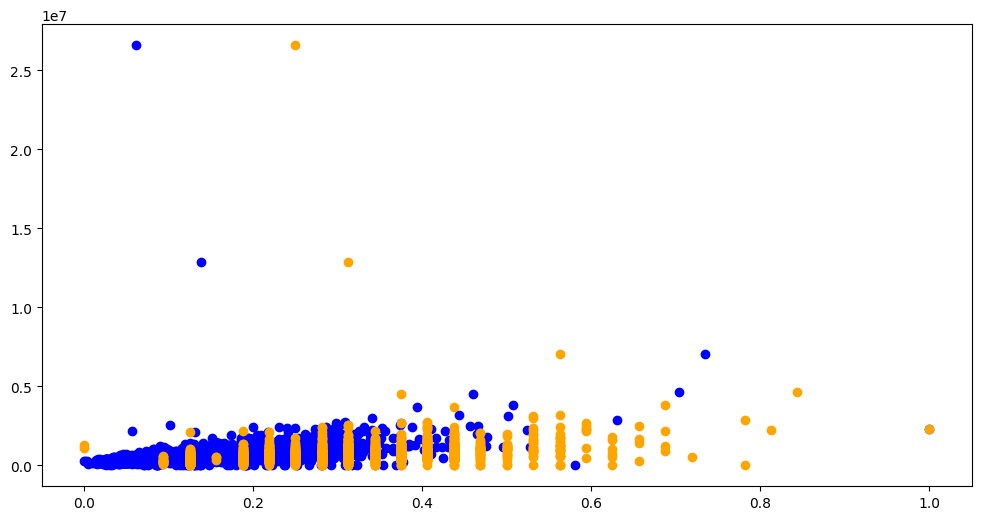

In [267]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(data=x_data_scaled, x='sqft_living', y='price', color='blue')
ax.scatter(data=x_data_scaled, x='bathrooms', y='price', color='orange')

In [268]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data_scaled[['sqft_living', 'bathrooms']].values,
    x_data_scaled['price'].values,
    random_state=2)

In [269]:
print(len(x_train),len(x_test))

3450 1150


In [270]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE',MAE)
print('r²',r2)

MAE 207349.7004963648
r² 0.06869032899821292


In [272]:
x_data_scaled['price_fit'] = model.predict(x_data_scaled[['sqft_living', 'bathrooms']].values)
x_data_scaled

,sqft_living,bathrooms,price,price_fit
0,0.073652,0.18750,3.130000e+05,337608.048508
1,0.249051,0.31250,2.384000e+06,958654.685998
2,0.118451,0.25000,3.420000e+05,493338.175394
3,0.123766,0.28125,4.200000e+05,509559.932344
4,0.119210,0.31250,5.500000e+05,490165.556655
...,...,...,...,...
4595,0.086560,0.21875,3.081667e+05,381226.830566
4596,0.082764,0.31250,5.343333e+05,358659.836138
4597,0.200456,0.31250,4.169042e+05,783313.725308
4598,0.130600,0.25000,2.034000e+05,537173.415566


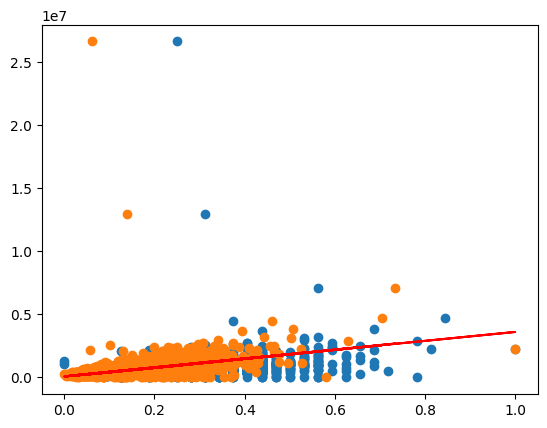

In [275]:
plt.scatter(data=x_data_scaled, x='bathrooms', y='price')
plt.scatter(data=x_data_scaled, x='sqft_living', y='price')
plt.plot(x_data_scaled['sqft_living'], x_data_scaled['price_fit'], color='red')

# a linha está sendo traçada a partir do sqft_living, 
# mas não é perfeita já que os dados do fit dependem de duas colunas, não uma

In [215]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data_scaled['sqft_living'].values,
    x_data_scaled['price'].values,
    random_state=3)

In [212]:
np.reshape(x_train, (-1,1))

array([[0.02429765],
       [0.15413819],
       [0.2118451 ],
       ...,
       [0.08656036],
       [0.07441154],
       [0.17236143]], shape=(3450, 1))

In [217]:
model = LinearRegression()
model.fit(X=np.reshape(x_train, (-1,1)), y=np.reshape(y_train, (-1,1)))

y_pred = model.predict(np.reshape(x_test, (-1,1)))

# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE',MAE)
print('r²',r2)

MAE 202353.94077168725
r² 0.06330075384533695


In [223]:
x_data_scaled['price_fit'] = model.predict(
    np.reshape(x_data_scaled['sqft_living'].values, (-1,1)))
x_data_scaled

,sqft_living,bathrooms,price,price_fit
0,0.073652,0.18750,3.130000e+05,337365.322046
1,0.249051,0.31250,2.384000e+06,949631.835646
2,0.118451,0.25000,3.420000e+05,493745.080930
3,0.123766,0.28125,4.200000e+05,512298.611646
4,0.119210,0.31250,5.500000e+05,496395.585318
...,...,...,...,...
4595,0.086560,0.21875,3.081667e+05,382423.896640
4596,0.082764,0.31250,5.343333e+05,369171.374700
4597,0.200456,0.31250,4.169042e+05,779999.554821
4598,0.130600,0.25000,2.034000e+05,536153.151137


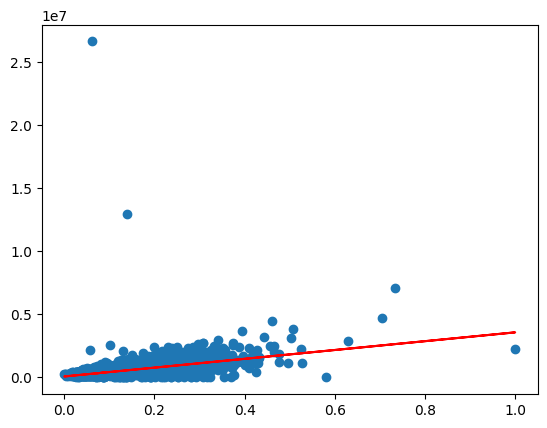

In [233]:
plt.scatter(data=x_data_scaled, x='sqft_living', y='price')
plt.plot(x_data_scaled['sqft_living'], x_data_scaled['price_fit'], color='red')